<a href="https://colab.research.google.com/github/AsadillahRamadhan/PCVK/blob/main/Pertemuan6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

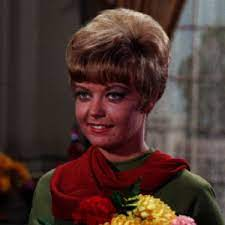

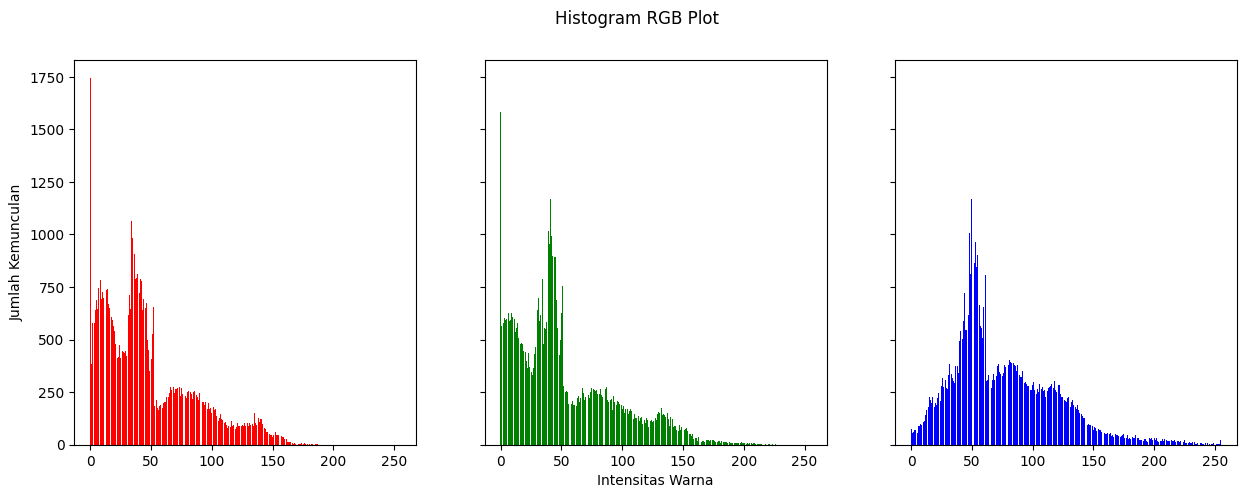

In [42]:
# 3 ( Membuat Histogram Citra Sesuai Flowchart )

image = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan3/female.jpeg')

red = [0] * 256
green = [0] * 256
blue = [0] * 256
intensity = []
for i in range(256):
  intensity.append(i)

for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    red[image[i,j,0]] += 1
    green[image[i,j,1]] += 1
    blue[image[i,j,2]] += 1

cv2_imshow(image)
print('\n')

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(15, 5))

axs[0].bar(intensity, red, color='red')
axs[1].bar(intensity, green, color='green')
axs[2].bar(intensity, blue, color='blue')
axs[1].set_xlabel('Intensitas Warna')
axs[0].set_ylabel('Jumlah Kemunculan')
plt.suptitle('Histogram RGB Plot')
plt.show()



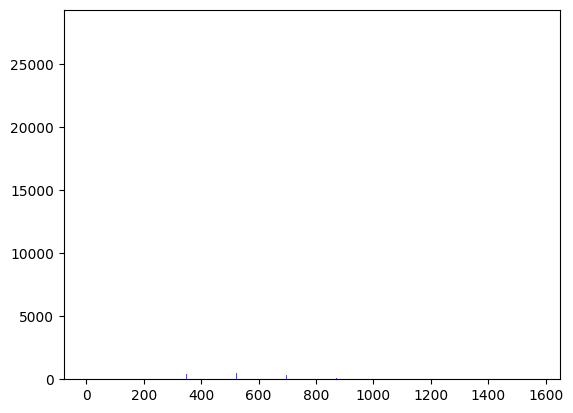

In [45]:
# 4 ( Membuat Historam dengan Library NumPy )
histogram, bins = np.histogram(red, weights=intensity)
plt.bar(bins[:-1], histogram, width=1, color='blue', alpha=0.7)
plt.show()

In [ ]:
# 5 ( Histogram Equalization )
image_grayscale = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan3/female.jpeg', cv.IMREAD_GRAYSCALE)
image_equalization = np.zeros(image_grayscale.shape, image_grayscale.dtype)

for x in range(image_grayscale.shape[0]):
  for y in range(image_grayscale.shape[1]):
    for c in range(image_grayscale.shape[2]):
      formula = round(
          (image_grayscale[x,y,c] * (math.pow(2, k) - 1)) / (image_grayscale.shape[0] * image_grayscale.shape[1])
      )
      image_equalization[x,y,c] = np.clip(formula, 0, 255)



In [69]:
# 8 ( Dithering Floyd and Steinberg )
image_8 = cv.imread('/content/drive/MyDrive/PCVK/Pertemuan3/female.jpeg')
image_fas = np.zeros(image_8.shape, image_8.dtype)

def threshold(nilai_warna):
  if(nilai_warna > 255):
    nilai_warna = 255
  elif(nilai_warna < 0):
    nilai_warna = 0

  return nilai_warna

for y in range(image_8.shape[1]):
  for x in range(image_8.shape[0]):
    pixelOld = [0,0,0]
    pixelNew = [0,0,0]
    error = [0,0,0]
    jarakPixel = 3
    for c in range(image_8.shape[2]):
      pixelOld[c] = image_8[x,y,c]
      pixelNew[c] = np.round(jarakPixel * pixelOld[c]/255.0) * (255/jarakPixel)
      image_fas[x,y,c] = pixelNew[c]
      error[0] = pixelOld[0] - pixelNew[0]
      image_fas[x+1,y,c] = threshold(image_fas[x+1,y,c] + error[c] * 7/16)
      image_fas[x+1,y+1,c] = threshold(image_fas[x+1,y+1,c] + error[c] * 3/16)
      image_fas[x,y+1,c] = threshold(image_fas[x,y+1,c] + error[c] * 5/16)
      image_fas[x-1,y+1,c] = threshold(image_fas[x-1,y+1,c] + error[c] * 1/16)


final_frame_8 = cv.hconcat((image_8, image_fas))
cv2_imshow(final_frame_8)

IndexError: ignored

225
